In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Creative Solution - Integrating BirdStrike Dataset

In [ ]:
# Loading Dataset
combined_df = pd.read_csv("/content/drive/MyDrive/SD/combined_all_SD.csv")

<ipython-input-3-8f675b38142b>:2: DtypeWarning: Columns (60,134) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv("/content/drive/MyDrive/SD/combined_all_SD.csv")


In [ ]:
# Selecting Relevant colums

columns_to_retain = ['MONTH', 'ORIGIN', 'DEST', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_DELAY_NEW', 'DEP_DEL15', 'ARR_DEL15', 'DISTANCE_x',
                     'PHASE_OF_FLIGHT', 'AOS', 'PRECIPITATION', 'SKY', 'ARR_TIME', 'DEP_TIME',
                     'STR_RAD',	'STR_WINDSHLD',	'STR_NOSE',	'STR_ENG1',	'STR_ENG2', 'STR_ENG3', 'STR_ENG4',	'STR_PROP',
                     'STR_WING_ROT',	'STR_FUSE', 'STR_LG', 'STR_TAIL', 'STR_LGHTS']

data = combined_df[columns_to_retain]

In [ ]:
# Feature Engineering

data["IsDelay"] = np.where((combined_df['DEP_DEL15'] == 1) | (combined_df['ARR_DEL15'] == 1), 1, 0)

label_encoder = LabelEncoder()
label_encoder.fit(pd.concat([data['DEST'], data['ORIGIN']]))

data["ORIGIN"] = label_encoder.transform(data['ORIGIN'])
data["DEST"] = label_encoder.transform(data['DEST'])
data["PATH"] = data["ORIGIN"] - data["DEST"]

data = data.drop(columns=['DEP_DEL15', 'ARR_DEL15', 'DEP_DELAY_NEW', 'ARR_DELAY_NEW', 'ORIGIN', 'DEST'])

<ipython-input-5-4f594489268d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["IsDelay"] = np.where((combined_df['DEP_DEL15'] == 1) | (combined_df['ARR_DEL15'] == 1), 1, 0)
<ipython-input-5-4f594489268d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ORIGIN"] = label_encoder.transform(data['ORIGIN'])
<ipython-input-5-4f594489268d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
# Creating Time-Blocks

def arr_time(x):

  if x >= 600 and x < 1200:
    return 'MORNING'
  elif x>=1200 and x<1600:
    return 'AFTERNOON'
  elif x>=1600 and x<2000:
    return 'EVENING'
  elif x>=2000 and x<0:
    return 'NIGHT'
  elif x>=0 and x<600:
    return 'MIDNIGHT'

data['ARR_TIME'] = data['ARR_TIME'].astype('int')
data['ARR_TIME_BLOCK'] = data['ARR_TIME'].apply(lambda x :arr_time(x))
data['DEP_TIME'] = data['DEP_TIME'].astype('int')
data['DEP_TIME_BLOCK'] = data['DEP_TIME'].apply(lambda x :arr_time(x))
data = data.drop(columns=[ 'ARR_TIME', 'DEP_TIME'])
data.reset_index(inplace=True)

In [ ]:
# Encoding Categorical Variables

label_encoder = LabelEncoder()
data["PHASE_OF_FLIGHT"] = label_encoder.fit_transform(data['PHASE_OF_FLIGHT'])
data["PRECIPITATION"] = label_encoder.fit_transform(data['PRECIPITATION'])
data["SKY"] = label_encoder.fit_transform(data['SKY'])
data['DEP_TIME_BLOCK'] = label_encoder.fit_transform(data['DEP_TIME_BLOCK'])
data['ARR_TIME_BLOCK'] = label_encoder.fit_transform(data['ARR_TIME_BLOCK'])

In [ ]:
data = data.drop(columns=['index'])

In [ ]:
# Creating Train-Test Split

X = data.drop(columns=["IsDelay"])
Y = data["IsDelay"]

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [ ]:
# Normalization

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model:", accuracy)
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred))

Accuracy of Logistic Regression model: 0.7408491947291361
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      5060
           1       0.00      0.00      0.00      1770

    accuracy                           0.74      6830
   macro avg       0.37      0.50      0.43      6830
weighted avg       0.55      0.74      0.63      6830



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
# Best params determined from Grid Search
rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=0)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model:", accuracy)
print("Classification Report for SVM:\n", classification_report(y_test, y_pred))

Accuracy of Random Forest model: 0.7541727672035139
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.76      0.98      0.85      5060
           1       0.64      0.11      0.19      1770

    accuracy                           0.75      6830
   macro avg       0.70      0.55      0.52      6830
weighted avg       0.73      0.75      0.68      6830



In [ ]:
# Support Vector Classifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear', C=1.0, random_state=0)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM model:", accuracy_svm)
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

Accuracy of SVM model: 0.7408491947291361
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      5060
           1       0.00      0.00      0.00      1770

    accuracy                           0.74      6830
   macro avg       0.37      0.50      0.43      6830
weighted avg       0.55      0.74      0.63      6830



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# XG-Boost

import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)

y_pred = xgb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of Random Forest model: 0.7380673499267936
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84      5060
           1       0.49      0.18      0.26      1770

    accuracy                           0.74      6830
   macro avg       0.62      0.56      0.55      6830
weighted avg       0.69      0.74      0.69      6830



In [ ]:
# Grid SearchCv for Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

rf_best = grid_search.best_estimator_
y_pred = rf_best.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with optimized Random Forest:", accuracy)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.75
Accuracy with optimized Random Forest: 0.746705710102489


In [ ]:
# Recurrsive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.svm import SVC

estimator = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=0)
selector = RFE(estimator, step=1)
selector = selector.fit(X_train_scaled, y_train)

In [ ]:
print("Columns: ", data.columns)
selector.support_

Columns:  Index(['MONTH', 'DISTANCE_x', 'PHASE_OF_FLIGHT', 'AOS', 'PRECIPITATION', 'SKY',
       'STR_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'STR_ENG2',
       'STR_ENG3', 'STR_ENG4', 'STR_PROP', 'STR_WING_ROT', 'STR_FUSE',
       'STR_LG', 'STR_TAIL', 'STR_LGHTS', 'IsDelay', 'PATH', 'ARR_TIME_BLOCK',
       'DEP_TIME_BLOCK'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True])

In [ ]:
y_pred = selector.predict(X_test_scaled)
y_pred = [1 if x >= 0.5 else 0 for x in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with RFE:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy with RFE: 0.7453879941434847
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85      5060
           1       0.54      0.13      0.21      1770

    accuracy                           0.75      6830
   macro avg       0.65      0.54      0.53      6830
weighted avg       0.70      0.75      0.68      6830



In [ ]:
# Balanced Bagging Classifier

from imblearn.ensemble import BalancedBaggingClassifier

#Create an instance
classifier = BalancedBaggingClassifier(
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)

classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with RFE:", accuracy)

Accuracy with RFE: 0.7304538799414348


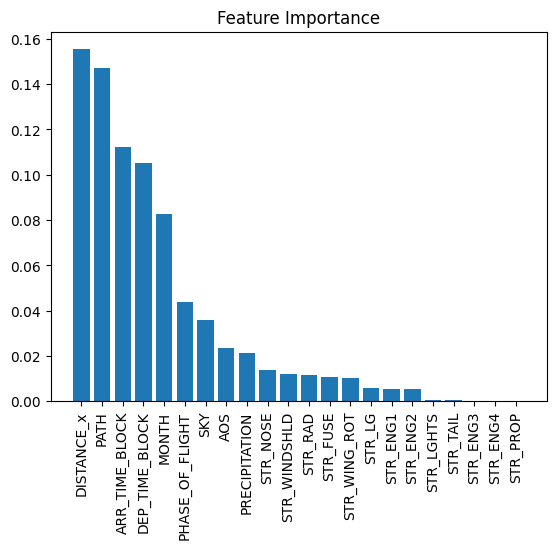

In [ ]:
# Feature Importance from our best model (Random Forest)
import matplotlib.pyplot as plt

feature_importances = rf_best.feature_importances_
feature_importances = feature_importances[1:]
features = X_train.columns

indices = np.argsort(feature_importances)[::-1]

names = [features[i] for i in indices]


plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()